<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Deep-Learning/blob/main/DL_MLP_Mnist%E6%99%82%E5%B0%9A%E7%89%A9%E5%93%81%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
# 查看訓練與測試資料中的筆數
print(x_train.shape)  # 六萬筆資料， 28*28的黑白圖像
print(y_train.shape)  # 六萬筆資料
print(x_test.shape)  # 一萬筆資料， 28*28的黑白圖像
print(y_test.shape)  # 一萬筆資料

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
f_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankleboot"
      }

4 Coat


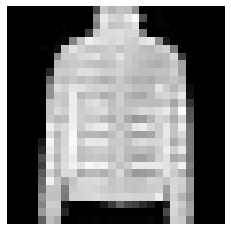

In [39]:
import random
c = random.randint(0, 59999)
thing = y_train[c]
print(thing, f_dict[thing])
plt.axis("off")  # 去除XY軸座標
plt.imshow(x_train[c], cmap="gray")  # 顯示圖像

# 資料預處理

In [40]:
# 資料預處理(題目)
# 將題目Normalize，與Keras準備的隨機weights比較搭 -> 除以255，讓值介於0-1之間
# 將題目攤開成一維(Keras，MLP的規定) -> 從二維(28*28)變成一維(784)

x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [41]:
# 資料預處理(答案)
# 希望答案以[P0, P1, ..., P9]的機率list呈現
# 將答案轉成one-hot encoding

from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 建立模型

In [42]:
from keras.models import Sequential  # 建立支架
from keras.layers import Dense  # 層採用全連接層

In [43]:
mlp = Sequential()  # 先建立支架
mlp.add(Dense(128, activation = "relu", input_dim = 784))  # 建立第一層(神經條數(憑經驗)，激活函式，輸入的數量)
mlp.add(Dense(10, activation = "softmax"))  # 建立第二層

mlp.summary()  # 印出的Param表示weight(須調整的參數)， Params總共有input數 * output數 + output數(bias，讓激活函式都是從0開始激活) 個

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 確定模型訓練方式

In [44]:
# loss -> 最後答案為0或1，使用binary_crossentropy，最後答案有多個，使用categorical_crossentropy
# optimizer -> 做梯度下降的時候優化(基於動量)

from tensorflow.keras.losses import CategoricalCrossentropy

mlp.compile(
      # loss = "categorical_crossentropy",
      loss = CategoricalCrossentropy(),
      metrics = ["accuracy"],
      optimizer = "adam"
      )

# 訓練模型

In [45]:
# batch -> 看幾筆資料就做一次梯度下降
# epochs -> 整份資料看幾次
# 10個epochs， 200batch = 60000 * 10 / 200 = 3000次梯度修正
# verbose -> 2: 去除進度條

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    # ModelCheckpoint("mlp.h5", save_best_only=True),  # 儲存最好係數的模型
    EarlyStopping(patience=5, restore_best_weights=True)  # 當訓練成效跟最好的比不佳n次時，就及早停止 restore_best_weights=True 回到最好那次的係數
        ]
        
mlp.fit(x_train_shape, y_train_cat,
        batch_size = 200,
        epochs = 50,
        validation_split = 0.1,
        callbacks = callbacks,
        verbose = 2
        )

# 驗證用資料的loss(val_loss)趨近平滑時就停止訓練
# EarlyStopping(patience=5, restore_best_weights=True) -> 五次沒有變好就自動停止訓練，並回到最好的那次結果

Epoch 1/50
270/270 - 2s - loss: 0.6049 - accuracy: 0.7919 - val_loss: 0.4498 - val_accuracy: 0.8427 - 2s/epoch - 7ms/step
Epoch 2/50
270/270 - 1s - loss: 0.4216 - accuracy: 0.8547 - val_loss: 0.4011 - val_accuracy: 0.8608 - 1s/epoch - 5ms/step
Epoch 3/50
270/270 - 1s - loss: 0.3868 - accuracy: 0.8651 - val_loss: 0.3883 - val_accuracy: 0.8585 - 1s/epoch - 5ms/step
Epoch 4/50
270/270 - 1s - loss: 0.3596 - accuracy: 0.8726 - val_loss: 0.3631 - val_accuracy: 0.8705 - 1s/epoch - 5ms/step
Epoch 5/50
270/270 - 1s - loss: 0.3390 - accuracy: 0.8790 - val_loss: 0.3496 - val_accuracy: 0.8723 - 1s/epoch - 5ms/step
Epoch 6/50
270/270 - 1s - loss: 0.3229 - accuracy: 0.8854 - val_loss: 0.3551 - val_accuracy: 0.8715 - 1s/epoch - 5ms/step
Epoch 7/50
270/270 - 1s - loss: 0.3115 - accuracy: 0.8882 - val_loss: 0.3495 - val_accuracy: 0.8770 - 1s/epoch - 5ms/step
Epoch 8/50
270/270 - 1s - loss: 0.3016 - accuracy: 0.8916 - val_loss: 0.3312 - val_accuracy: 0.8798 - 1s/epoch - 4ms/step
Epoch 9/50
270/270 - 1s 

# 進行預測

In [46]:
# 預測完和正確答案做比較
mlp.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8845


[0.33439406752586365, 0.8845000267028809]

In [47]:
# 分類

import numpy as np

pre = np.argmax(mlp.predict(x_test_shape), axis = 1)
pre

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

# 找出預測錯誤的類別

In [48]:
# 混淆矩陣

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))  # 測試用答案，預測用題目

,0,1,2,3,4,5,6,7,8,9
0,824,1,23,29,2,1,112,0,8,0
1,1,977,0,16,2,0,4,0,0,0
2,11,1,816,15,65,0,91,0,1,0
3,23,9,13,908,23,0,19,0,5,0
4,0,1,113,46,733,0,101,0,6,0
5,0,0,0,0,0,969,0,20,1,10
6,112,2,68,39,38,0,733,0,8,0
7,0,0,0,0,0,15,0,959,1,25
8,5,1,7,4,3,2,4,5,969,0
9,0,0,0,0,0,6,1,36,0,957


In [49]:
# != -> 表示不相等的會顯示True
# np.nonzero -> 找出不等於0(True)的位子，結果是一個Tuple
diff = np.nonzero(pre != y_test)[0]

# 將"預測錯誤的"位子代入測試用答案，以顯示類別
orifalse = y_test[diff]

# 將"預測錯誤的"位子代入測試用題目，以顯示類別
prefalse = pre[diff]

# 圖將"預測錯誤的"位子代入圖，以顯示圖
imgfalse = x_test[diff]

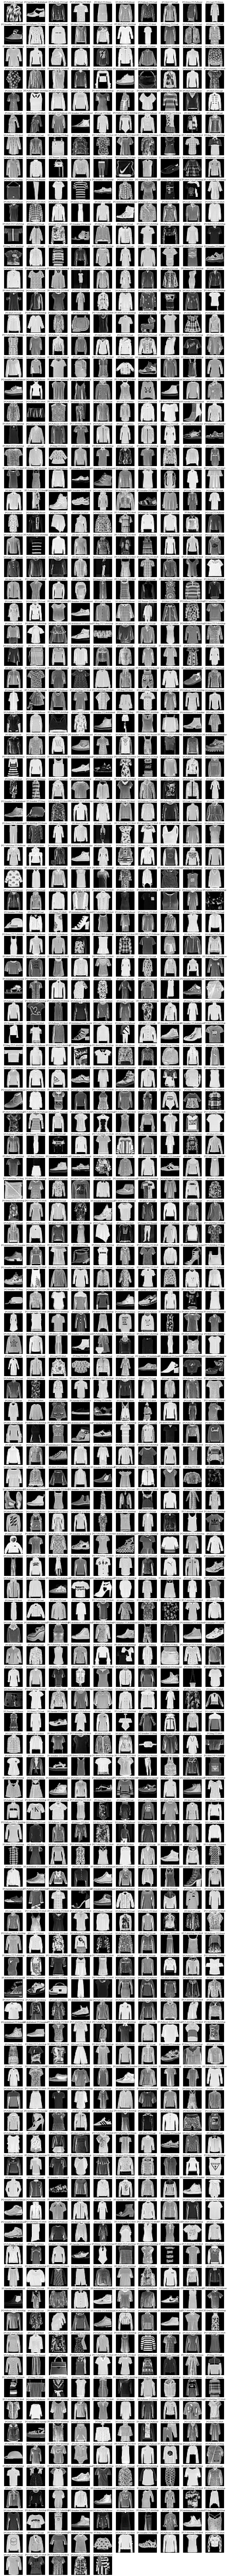

In [56]:
# 設定畫布尺寸(寬, 高)
plt.figure(figsize=(25, 300))

# 設定每一格subplot的寬高
w = 10
h = int(len(imgfalse) / w) + 1

# 印出預測錯的圖片，P -> 預測類別，O -> 正確類別
for (i, img) in enumerate(imgfalse):

  # 將畫布分成數塊做出小圖(列數， 行數， 第幾張圖開始)
  plt.subplot(h, w, i + 1)

  # 取消XY座標軸
  plt.axis("off")

  # 每個圖的標題
  t = "[P]:" + f_dict[prefalse[i]] + " [T]:" + f_dict[orifalse[i]]
  plt.title(t)
  plt.imshow(img, cmap = "gray")